In [1]:
import frank_lab

In [2]:
fileroot = '/mnt/disks/KarlssonData/Data/';

In [3]:
import os
anim_dirs = [(d, os.path.join(fileroot,d)) for d in os.listdir(fileroot) if os.path.isdir(os.path.join(fileroot,d))]
print(anim_dirs)


[('Eig', '/mnt/disks/KarlssonData/Data/Eig'), ('Fra', '/mnt/disks/KarlssonData/Data/Fra'), ('Fiv', '/mnt/disks/KarlssonData/Data/Fiv'), ('Mil', '/mnt/disks/KarlssonData/Data/Mil'), ('Ten', '/mnt/disks/KarlssonData/Data/Ten'), ('Dud', '/mnt/disks/KarlssonData/Data/Dud'), ('Bon', '/mnt/disks/KarlssonData/Data/Bon'), ('Con', '/mnt/disks/KarlssonData/Data/Con'), ('Cor', '/mnt/disks/KarlssonData/Data/Cor')]


In [10]:
all_tasks = {}

for (anim, dd) in anim_dirs : 
    print(anim)
    task = frank_lab.load_data(dd, datatype='task')
    task = task.sort_values(by=['Day','Epoch'])
    all_tasks[anim] = task


Eig
Loading Eigtask07.mat
Loading Eigtask05.mat
Loading Eigtask01.mat
Loading Eigtask03.mat
Loading Eigtask04.mat
Loading Eigtask06.mat
Loading Eigtask02.mat
Fra
Loading fratask08.mat
Loading fratask05.mat
Loading fratask04.mat
Loading fratask02.mat
Loading fratask09.mat
Loading fratask03.mat
Loading fratask07.mat
Loading fratask06.mat
Loading fratask10.mat
Loading fratask11.mat
Loading fratask12.mat
Fiv
Loading Fivtask07.mat
Loading Fivtask08.mat
Loading Fivtask05.mat
Loading Fivtask04.mat
Loading Fivtask01.mat
Loading Fivtask06.mat
Loading Fivtask02.mat
Loading Fivtask03.mat
Loading Fivtask09.mat
Mil
Loading miltask04.mat
Loading miltask05.mat
Loading miltask01.mat
Loading miltask03.mat
Loading miltask02.mat
Ten
Loading tentask03.mat
Loading tentask06.mat
Loading tentask07.mat
Loading tentask01.mat
Loading tentask05.mat
Loading tentask02.mat
Loading tentask04.mat
Dud
Loading dudtask06.mat
Loading dudtask05.mat
Loading dudtask03.mat
Loading dudtask04.mat
Loading dudtask02.mat
Loading 

In [11]:
tt = all_tasks['Eig'].query('type=="run"')

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize': (12, 6),'lines.linewidth': 2, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style('white')


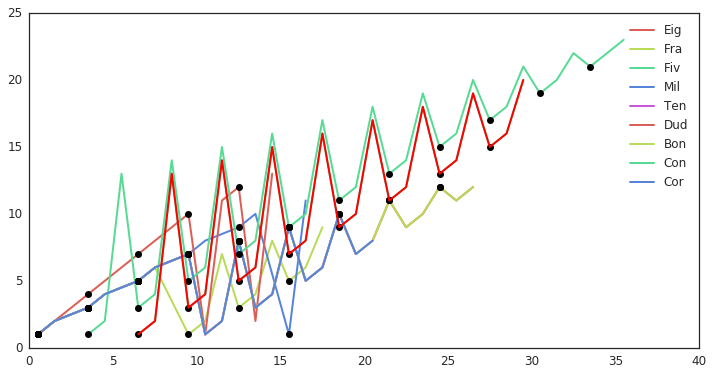

In [42]:
sns.set_palette(sns.color_palette("hls", 5))
for (anim, dd) in reversed(anim_dirs) : 
    tt = all_tasks[anim].query('type=="run"')
    plt.plot(tt['Day']*3+(tt['Epoch']/2), tt['exposure'],'-')
    
plt.legend([anim for (anim, dd) in anim_dirs])
for (anim, dd) in anim_dirs : 
    tt = all_tasks[anim].query('type=="run"')
    ss = tt.query('Epoch == 1')
    plt.plot(ss['Day']*3 + 0.5, ss['exposure'],'ko')
    
tt = all_tasks['Bon'].query('type=="run"')
plt.plot(tt['Day']*3+(tt['Epoch']/2), tt['exposure'],'r-')

# What we learn from this figure is that the following animals have a NOVEL/NOVEL/FAMILIAR PATTERN:
#   Fra, Con, Bon
# The others have a FAMILIAR/NOVEL/NOVEL pattern
#   Eig (overlaid by Cor), Cor, Mil, Fiv, Ten
# Or are wierd (Dud, only 2 runs per day)


In [39]:
all_tasks['Dud']

,Day,Epoch,type,exposure,environment,description,sleepnum,dailyexposure,exposureday,experimentday,tracksexperienced,dailytracksexperienced
26,0,0,sleep,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
27,0,1,run,1.0,TrackA,TrackA,NaN,1.0,1.0,1.0,1.0,1.0
28,0,2,sleep,NaN,NaN,[],2.0,NaN,NaN,NaN,NaN,NaN
29,0,3,run,2.0,TrackA,TrackA,NaN,2.0,1.0,1.0,1.0,1.0
30,0,4,sleep,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
21,1,0,sleep,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
22,1,1,run,3.0,TrackA,TrackA,NaN,1.0,2.0,2.0,1.0,1.0
23,1,2,sleep,NaN,NaN,[],2.0,NaN,NaN,NaN,NaN,NaN
24,1,3,run,4.0,TrackA,TrackA,NaN,2.0,2.0,2.0,1.0,1.0
25,1,4,sleep,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
